<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_walkforward_anomaly_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Standardized Environment Setup

# Uninstall conflicting packages (one-time cleanup)
!pip uninstall -y protobuf tensorflow gym keras torch torchvision torchaudio || true

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2
Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
# Install Core ML & RL Libraries (pinned versions)
!pip install protobuf==3.20.3 tensorflow==2.18.0 stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib matplotlib pandas numpy scipy scikit-learn imblearn


  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.4 MB/s eta 0:00:00
  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Using cached prot

In [ ]:
# Install PyTorch with CUDA 12.4 support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124


In [ ]:
# RAPIDS GPU Acceleration (CUDA 12 compatible)
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0


  Using cached dask-2024.11.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached rapids_dask_dependency-24.12.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached cudf_cu12-24.12.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (6.2 kB)
  Using cached cuml_cu12-24.12.0-cp311-cp311-manylinux_2_28_x86_64.whl
  Using cached pylibraft_cu12-24.12.0-cp311-cp311-manylinux_2_28_x86_64.whl
  Using cached pylibcudf_cu12-24.12.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (4.9 kB)
  Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached partd-1.4.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_1

In [ ]:
# Set CUDA Paths (clearly once)
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'

# Verify GPU Availability and Library Versions
import torch, tensorflow as tf, cudf, cuml, dask, gymnasium, stable_baselines3
print("\nGPU & Library Versions")
print("-------------------------")
print(f"PyTorch Version: {torch.__version__}, GPU: {torch.cuda.is_available()}")
print(f"TensorFlow Version: {tf.__version__}, GPU: {tf.config.list_physical_devices('GPU')}")
print(f"cuDF Version: {cudf.__version__}")
print(f"cuML Version: {cuml.__version__}")
print(f"Dask Version: {dask.__version__}")
print(f"Gymnasium Version: {gymnasium.__version__}")
print(f"Stable Baselines3 Version: {stable_baselines3.__version__}")

# Final GPU Check
!nvidia-smi


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))



GPU & Library Versions
-------------------------
PyTorch Version: 2.6.0+cu124, GPU: False
TensorFlow Version: 2.18.0, GPU: []
cuDF Version: 24.12.00
cuML Version: 24.12.00
Dask Version: 2024.11.2
Gymnasium Version: 1.1.1
Stable Baselines3 Version: 2.6.0
/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install yfinance --upgrade --quiet


In [ ]:
# UNIFIED UNSUPERVISED TRADING MODULE (PyTorch Autoencoder CPU-safe)

import os
import gc
import cudf
import cuml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cuml.cluster import DBSCAN, KMeans as cuKMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import yfinance as yf

# PyTorch replacement for Keras
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Ticker list
TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

ANALYZE_METHODS = True
anomaly_eval_summary = []

def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                if 'Date' not in df.columns and 'Datetime' in df.columns:
                    df.rename(columns={'Datetime': 'Date'}, inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error downloading {ticker} (attempt {attempt}): {e}")
            time.sleep(attempt * 5)
    print(f"❌ Failed to download {ticker}")
    return None

def compute_technical_indicators(df):
    df = df.copy()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

def run_isolation_forest(df):
    X = df[['RSI', 'MACD', 'OBV']]
    clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    df['anomaly_iforest'] = clf.fit_predict(X)
    return df

def run_one_class_svm(df):
    X = StandardScaler().fit_transform(df[['RSI', 'MACD', 'OBV']])
    svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
    df['anomaly_ocsvm'] = svm.fit_predict(X)
    return df

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(),
            nn.Linear(64, 32), nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32), nn.ReLU(),
            nn.Linear(32, 64), nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

def run_autoencoder(df):
    X = StandardScaler().fit_transform(df[['RSI', 'MACD', 'OBV']])
    X_tensor = torch.tensor(X, dtype=torch.float32)
    model = Autoencoder(X_tensor.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()
    model.train()
    for epoch in range(30):
        optimizer.zero_grad()
        output = model(X_tensor)
        loss = criterion(output, X_tensor)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        recon = model(X_tensor)
        mse = torch.mean((X_tensor - recon) ** 2, dim=1).numpy()
        df['anomaly_autoencoder'] = (mse > np.percentile(mse, 95)).astype(int)
    return df

# Run full pipeline and store results
all_dfs = {}
summary = []

for ticker in TICKERS:
    print(f"Processing {ticker}")
    df = download_stock_data(ticker)
    if df is None or len(df) < 100:
        continue

    df = compute_technical_indicators(df)
    df = run_isolation_forest(df)
    df = run_one_class_svm(df)
    df = run_autoencoder(df)

    df['Date'] = pd.to_datetime(df['Date'])
    df['signal'] = 0
    df.loc[df['anomaly_autoencoder'] == 1, 'signal'] = -1
    df.loc[(df['RSI'] < 30) & (df['anomaly_autoencoder'] == 0), 'signal'] = 1
    df['signal_shifted'] = df['signal'].shift(1).fillna(0)
    df['daily_return'] = df['Close'].pct_change().fillna(0)
    df['strategy_return'] = df['signal_shifted'] * df['daily_return']
    df['cumulative'] = (1 + df['strategy_return']).cumprod()

    all_dfs[ticker] = df.copy()

    os.makedirs("results/unsupervised", exist_ok=True)
    df.to_csv(f"results/unsupervised/{ticker}_anomaly_signals.csv", index=False)

    summary.append({
        "Ticker": ticker,
        "AE Anomalies": int(df['anomaly_autoencoder'].sum()),
        "IForest Anomalies": int(df['anomaly_iforest'].sum()),
        "OCSVM Anomalies": int(df['anomaly_ocsvm'].sum()),
        "Overlap AE+IF": int(((df['anomaly_autoencoder'] == 1) & (df['anomaly_iforest'] == 1)).sum()),
        "Overlap AE+OC": int(((df['anomaly_autoencoder'] == 1) & (df['anomaly_ocsvm'] == 1)).sum()),
        "Sharpe": np.mean(df['strategy_return']) / (np.std(df['strategy_return']) + 1e-6) * np.sqrt(252),
        "Drawdown": (df['cumulative'].cummax() - df['cumulative']).max(),
        "Final Value": df['cumulative'].iloc[-1]
    })

    if ANALYZE_METHODS:
        anomaly_eval_summary.append({
            "Ticker": ticker,
            "Autoencoder": int(df['anomaly_autoencoder'].sum()),
            "IForest": int(df['anomaly_iforest'].sum()),
            "OCSVM": int(df['anomaly_ocsvm'].sum()),
            "Overlap_AE_IF": int(((df['anomaly_autoencoder'] == 1) & (df['anomaly_iforest'] == 1)).sum()),
            "Overlap_AE_OCSVM": int(((df['anomaly_autoencoder'] == 1) & (df['anomaly_ocsvm'] == 1)).sum())
        })

# Save summary
summary_df = pd.DataFrame(summary)
os.makedirs("results/unsupervised", exist_ok=True)
summary_df.to_csv("results/unsupervised/summary_unsupervised_signals.csv", index=False)

if ANALYZE_METHODS:
    df_eval = pd.DataFrame(anomaly_eval_summary)
    df_eval.to_csv("results/unsupervised/anomaly_comparison_summary.csv", index=False)
    print("Anomaly comparison summary saved.")

print("\nAll tickers processed and summary saved.")


Processing AAPL


[*********************100%***********************]  1 of 1 completed


Processing TSLA


[*********************100%***********************]  1 of 1 completed


Processing MSFT


[*********************100%***********************]  1 of 1 completed


Processing GOOGL


[*********************100%***********************]  1 of 1 completed


Processing AMZN


[*********************100%***********************]  1 of 1 completed


Processing NVDA


[*********************100%***********************]  1 of 1 completed


Processing META


[*********************100%***********************]  1 of 1 completed


Processing BRK-B


[*********************100%***********************]  1 of 1 completed


Processing JPM


[*********************100%***********************]  1 of 1 completed


Processing JNJ


[*********************100%***********************]  1 of 1 completed


Processing XOM


[*********************100%***********************]  1 of 1 completed


Processing V


[*********************100%***********************]  1 of 1 completed


Processing PG


[*********************100%***********************]  1 of 1 completed


Processing UNH


[*********************100%***********************]  1 of 1 completed


Processing MA


[*********************100%***********************]  1 of 1 completed


Processing HD


[*********************100%***********************]  1 of 1 completed


Processing LLY


[*********************100%***********************]  1 of 1 completed


Processing MRK


[*********************100%***********************]  1 of 1 completed


Processing PEP


[*********************100%***********************]  1 of 1 completed


Processing KO


[*********************100%***********************]  1 of 1 completed


Processing BAC


[*********************100%***********************]  1 of 1 completed


Processing ABBV


[*********************100%***********************]  1 of 1 completed


Processing AVGO


[*********************100%***********************]  1 of 1 completed


Processing PFE


[*********************100%***********************]  1 of 1 completed


Processing COST


[*********************100%***********************]  1 of 1 completed


Processing CSCO


[*********************100%***********************]  1 of 1 completed


Processing TMO


[*********************100%***********************]  1 of 1 completed


Processing ABT


[*********************100%***********************]  1 of 1 completed


Processing ACN


[*********************100%***********************]  1 of 1 completed


Processing WMT


[*********************100%***********************]  1 of 1 completed


Processing MCD


[*********************100%***********************]  1 of 1 completed


Processing ADBE


[*********************100%***********************]  1 of 1 completed


Processing DHR


[*********************100%***********************]  1 of 1 completed


Processing CRM


[*********************100%***********************]  1 of 1 completed


Processing NKE


[*********************100%***********************]  1 of 1 completed


Processing INTC


[*********************100%***********************]  1 of 1 completed


Processing QCOM


[*********************100%***********************]  1 of 1 completed


Processing NEE


[*********************100%***********************]  1 of 1 completed


Processing AMD


[*********************100%***********************]  1 of 1 completed


Processing TXN


[*********************100%***********************]  1 of 1 completed


Processing AMGN


[*********************100%***********************]  1 of 1 completed


Processing UPS


[*********************100%***********************]  1 of 1 completed


Processing LIN


[*********************100%***********************]  1 of 1 completed


Processing PM


[*********************100%***********************]  1 of 1 completed


Processing UNP


[*********************100%***********************]  1 of 1 completed


Processing BMY


[*********************100%***********************]  1 of 1 completed


Processing LOW


[*********************100%***********************]  1 of 1 completed


Processing RTX


[*********************100%***********************]  1 of 1 completed


Processing CVX


[*********************100%***********************]  1 of 1 completed


Processing IBM


[*********************100%***********************]  1 of 1 completed


Processing GE


[*********************100%***********************]  1 of 1 completed


Processing SBUX


[*********************100%***********************]  1 of 1 completed


Processing ORCL


[*********************100%***********************]  1 of 1 completed


Anomaly comparison summary saved.

All tickers processed and summary saved.


In [27]:
def evaluate_anomaly_agreement(df):
    return {
        "Autoencoder": int(df['anomaly_autoencoder'].sum()),
        "IForest": int(df['anomaly_iforest'].sum()),
        "OCSVM": int(df['anomaly_ocsvm'].sum()),
        "Overlap AE & IF": int(((df['anomaly_autoencoder'] == 1) & (df['anomaly_iforest'] == 1)).sum()),
        "Overlap AE & OCSVM": int(((df['anomaly_autoencoder'] == 1) & (df['anomaly_ocsvm'] == 1)).sum())
    }

# Loop through all 53 stocks in all_dfs
agreement_summary = []

for ticker, df in all_dfs.items():
    stats = evaluate_anomaly_agreement(df)
    stats['Ticker'] = ticker
    agreement_summary.append(stats)

# Convert to DataFrame and save
agreement_df = pd.DataFrame(agreement_summary)
agreement_df = agreement_df[['Ticker', 'Autoencoder', 'IForest', 'OCSVM', 'Overlap AE & IF', 'Overlap AE & OCSVM']]
agreement_df.to_csv("results/unsupervised/anomaly_comparison_summary.csv", index=False)

print("Anomaly agreement summary saved for all 53 stocks.")


Anomaly agreement summary saved for all 53 stocks.


In [28]:
# Sort by Final Value (strategy performance)
top_5 = summary_df.sort_values(by='Final Value', ascending=False).head(5)
bottom_5 = summary_df.sort_values(by='Final Value', ascending=True).head(5)

print("Top 5 Performing Stocks:")
print(top_5[['Ticker', 'Final Value', 'Sharpe', 'Drawdown']])

print("\nBottom 5 Performing Stocks:")
print(bottom_5[['Ticker', 'Final Value', 'Sharpe', 'Drawdown']])


Top 5 Performing Stocks:
   Ticker  Final Value    Sharpe  Drawdown
39    TXN     1.378452  0.339745  0.200895
21   ABBV     1.362159  0.384923  0.096799
35   INTC     1.325803  0.206868  0.274713
20    BAC     1.288267  0.259047  0.159935
48    CVX     1.285156  0.289971  0.156321

Bottom 5 Performing Stocks:
   Ticker  Final Value    Sharpe  Drawdown
1    TSLA     0.529604 -0.222372  0.677244
52   ORCL     0.601001 -0.401895  0.421777
13    UNH     0.639139 -0.439555  0.386177
5    NVDA     0.643600 -0.177830  0.437567
33    CRM     0.719966 -0.244855  0.322423


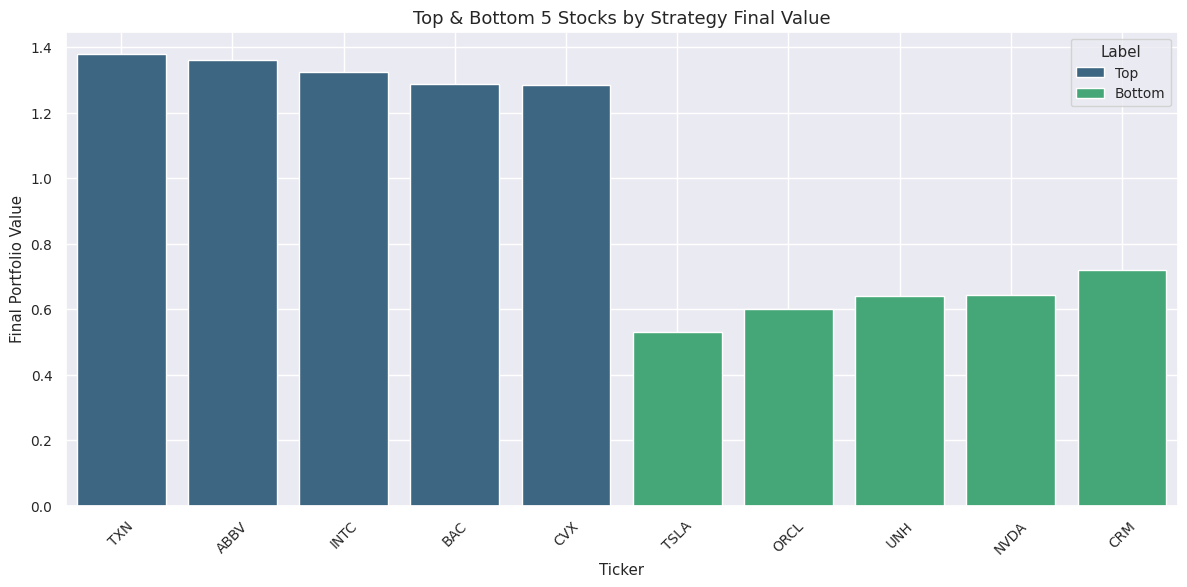

In [36]:
plt.figure(figsize=(12, 6))
combined = pd.concat([top_5, bottom_5])
combined['Label'] = ['Top'] * len(top_5) + ['Bottom'] * len(bottom_5)

sns.barplot(data=combined, x='Ticker', y='Final Value', hue='Label', palette='viridis', dodge=False)

plt.title("Top & Bottom 5 Stocks by Strategy Final Value", fontsize=13)
plt.ylabel("Final Portfolio Value")
plt.xlabel("Ticker")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
